In [1]:
import numpy as np
import time
from numba import njit, prange
import matplotlib.pyplot as plt

In [2]:
@njit(parallel=True)
def calculate_voronoi(size, seeds):
    """
    Computes the Voronoi diagram for a grid of given size using the 
    parallelized features of numba.

    Parameters:
    - size: int, the width and height of the 2D area
    - seeds: numpy array of shape (N, 2), the coordinates of seed points

    Returns:
    - area: numpy array of shape (size, size), each entry contains 
            the index of the closest seed at that point
    """
    # Initialize the result area with zeros
    area = np.zeros((size, size))

    # Parallelized loop across each point in grid using prange
    for i in prange(size):
        for j in range(size):
            closest_seed = -1
            closest_distance = size * size  # Initially, set max possible distance

            # Compare the current point to each seed
            for k in range(len(seeds)):
                point1 = np.array([float(seeds[k][0]), float(seeds[k][1])])  # Seed coordinates
                point2 = np.array([float(i), float(j)])  # Current grid point
                temp = point1 - point2
                sum_sq = np.sum(np.square(temp))  # Sum of squares
                dist = np.sqrt(sum_sq)  # Euclidean distance

                # Update closest seed if current seed is closer
                if dist < closest_distance:
                    closest_distance = dist
                    closest_seed = k

            # Assign the index of the closest seed to the current cell
            area[i][j] = closest_seed

    return area

In [3]:
# Define problem size and seed values
size = 4096
seeds = np.array([[0, 0], [0, size - 1], [size - 1, size - 1], [size - 1, 0]])

# Start Voronoi computation
start = time.time()
area = calculate_voronoi(size, seeds)
end = time.time()
elapsed = end - start

# Display timing results
print("--------------------------------------------------")
print("| PARALLEL PYTHON (NUMBA) VORONOI IMPLEMENTATION |")
print("--------------------------------------------------")
print(f"Array size: {size}")
print(f"[PY] voronoi_numba.py: {elapsed:.3f} seconds")

--------------------------------------------------
| PARALLEL PYTHON (NUMBA) VORONOI IMPLEMENTATION |
--------------------------------------------------
Array size: 4096
[PY] voronoi_numba.py: 1.846 seconds


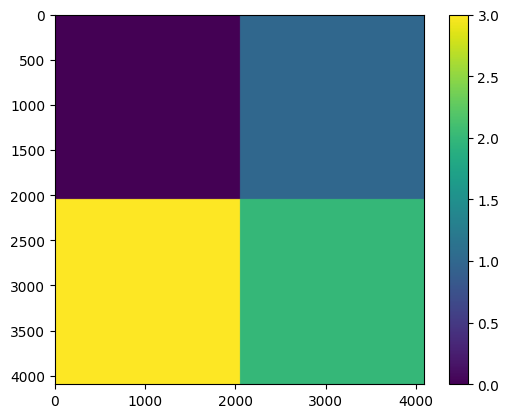

In [4]:
plt.imshow(area, cmap='viridis')
plt.colorbar()
plt.show()